### Install Package

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns

### Gathering Data from kaggle

In [2]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets list

ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned      Students Performance | Clean Dataset             10KB  2024-10-29 19:32:26           9700        178  1.0              
ikynahidwin/depression-professional-dataset                   Depression Professional Dataset                  16KB  2024-11-20 06:39:18           1048         26  1.0              
steve1215rogg/student-lifestyle-dataset                       student lifestyle dataset                        22KB  2024-11-11 19:11:28           4562         68  1.0              
ikynahidwin/depression-student-dataset                        Depression Student Dataset  

In [4]:
!kaggle datasets download -d nikhil7280/student-performance-multiple-linear-regression

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
License(s): other
  0% 0.00/48.5k [00:00<?, ?B/s]
100% 48.5k/48.5k [00:00<00:00, 48.9MB/s]


### Extract File Zip

In [5]:
import zipfile

In [6]:
dataset = zipfile.ZipFile('/content/student-performance-multiple-linear-regression.zip', 'r')

dataset.extractall()

### Cleaning Data

In [7]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [9]:
# Checking duplicate data in dataset

print("Total duplicated data in df1:",df.duplicated().sum())

Total duplicated data in df1: 127


In [10]:
# Checking outlier data in dataset

df.describe(include='all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


In [11]:
df = df.drop_duplicates()
print("Total duplicated data in df1:",df.duplicated().sum())

Total duplicated data in df1: 0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [13]:
df = pd.get_dummies(df, columns=['Extracurricular Activities'])
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,False,True
1,4,82,4,2,65.0,True,False
2,8,51,7,2,45.0,False,True
3,5,52,5,2,36.0,False,True
4,7,75,8,5,66.0,True,False


In [14]:
def f(x):
  if x == False:
    return 0
  elif x == True:
    return 1

column_bool = ['Extracurricular Activities_No', 'Extracurricular Activities_Yes']
for column in column_bool:
  df[column] = df[column].apply(f)

df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0


In [15]:
df.to_csv('Student_Performance_Clean.csv', index=False)

### Processing Data

In [16]:
# Load Dataset
data = pd.read_csv('/content/Student_Performance_Clean.csv')

In [17]:
# Define Features and Target
X = data[['Hours Studied', 'Sleep Hours', 'Previous Scores', 'Sample Question Papers Practiced', 'Extracurricular Activities_No', 'Extracurricular Activities_Yes']]
y = data['Performance Index']

In [18]:
# Normalize Features and Target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [19]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [20]:
# Build Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='mse',
    metrics=['mae']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# @title
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)

In [23]:
# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=500,  # Increased to allow for convergence
    batch_size=64,  # Adjusted for balance between stability and speed
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

Epoch 1/500
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.1585 - mae: 0.3790 - val_loss: 0.9018 - val_mae: 0.1851 - learning_rate: 1.0000e-04
Epoch 2/500
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8930 - mae: 0.2154 - val_loss: 0.7770 - val_mae: 0.1799 - learning_rate: 1.0000e-04
Epoch 3/500
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7586 - mae: 0.1901 - val_loss: 0.6678 - val_mae: 0.1770 - learning_rate: 1.0000e-04
Epoch 4/500
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6450 - mae: 0.1733 - val_loss: 0.5695 - val_mae: 0.1677 - learning_rate: 1.0000e-04
Epoch 5/500
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5454 - mae: 0.1554 - val_loss: 0.4858 - val_mae: 0.1631 - learning_rate: 1.0000e-04
Epoch 6/500
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4613 - mae: 0.1435 - val_loss: 0.4093 - val_mae: 0.1476 - learning_rate: 1.0000e-04
Epoch 7/500
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3928 - mae: 0.1406 - val_loss: 0.3449 - val_mae: 0.1365

In [24]:
# Evaluate Model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Loss: {loss:.4f}")
print(f"Final MAE: {mae:.4f}")

Final Loss: 0.0031
Final MAE: 0.0266


In [25]:
# Plot Loss and MAE
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

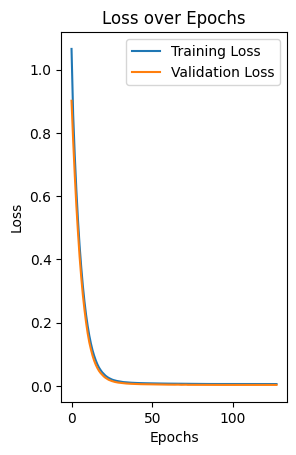

In [26]:
# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

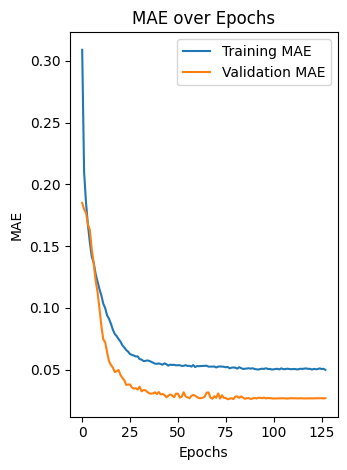

In [27]:
# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
# Make Predictions
y_pred_scaled = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
# Rescale predictions to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

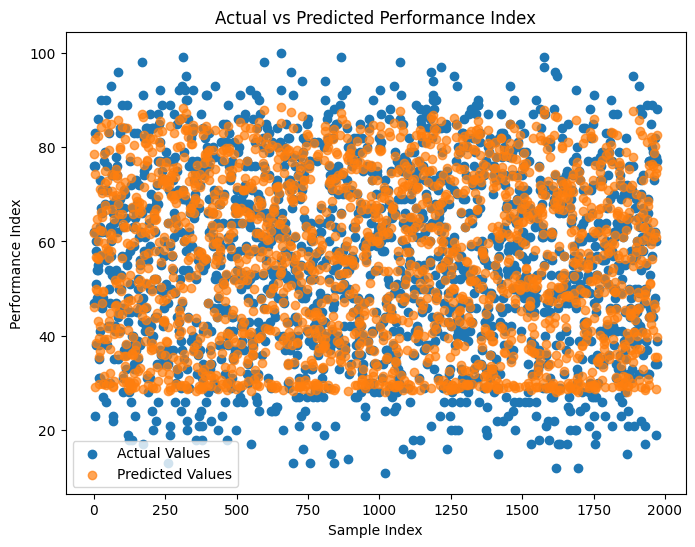

In [30]:
# Visualize Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test_original)), y_test_original, label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', alpha=0.7)
plt.title('Actual vs Predicted Performance Index')
plt.xlabel('Sample Index')
plt.ylabel('Performance Index')
plt.legend()
plt.show()

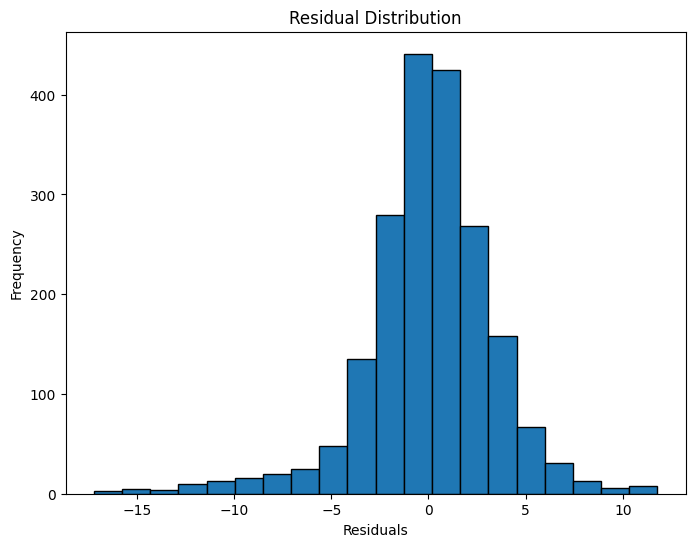

In [31]:
# Visualize Residuals
residuals = y_test_original.flatten() - y_pred.flatten()
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

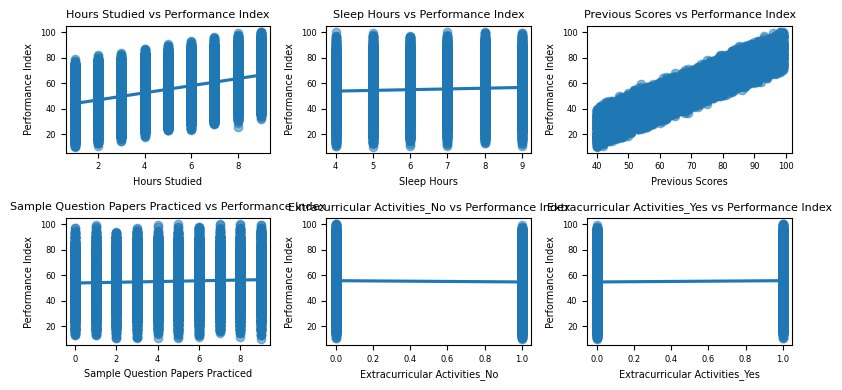

In [32]:
# Calculate number of rows and columns for subplots
num_features = len(X.columns)
num_rows = 2  # You can change this if you have more features
num_cols = 3  # You can adjust this based on your preference

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4))  # Adjust figsize as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through features and plot on subplots
for i, feature in enumerate(X.columns):
    sns.regplot(x=feature, y=y, data=data, scatter_kws={'alpha':0.5}, ax=axes[i])
    axes[i].set_title(f'{feature} vs Performance Index', fontsize=8)  # Adjust fontsize
    axes[i].set_xlabel(feature, fontsize=7)  # Adjust fontsize
    axes[i].set_ylabel('Performance Index', fontsize=7)  # Adjust fontsize
    axes[i].tick_params(axis='both', labelsize=6)  # Adjust tick label size

# Hide any unused subplots (if num_features < num_rows * num_cols)
for i in range(num_features, num_rows * num_cols):
    axes[i].set_visible(False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test_original and y_pred are your actual and predicted values
mae = mean_absolute_error(y_test_original, y_pred)
mape = np.mean(np.abs((y_test_original - y_pred) / y_test_original)) * 100
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 2.398481675160082
Mean Absolute Percentage Error: 6.121926342344084
Mean Squared Error: 11.459384113181374
Root Mean Squared Error: 3.385171208843265
R2 Score: 0.9692088393160702


### Prediction Model

In [34]:
def predict_performance(model, scaler_X, scaler_y, Hours_Studied, Sleep_Hours, Previous_Scores, Sample_Question_Papers_Practiced, Extracurricular_Activities):
  """
  Memprediksi Performance Index berdasarkan input fitur.

  Args:
    model: Model TensorFlow yang sudah dilatih.
    scaler_X: MinMaxScaler untuk fitur.
    scaler_y: MinMaxScaler untuk target.
    Hours_Studied: Jumlah jam belajar (0-24).
    Sleep_Hours: Jumlah jam tidur (0-24).
    Previous_Scores: Skor sebelumnya (0-100).
    Sample_Question_Papers_Practiced: Jumlah lembar soal latihan yang dikerjakan (0-100).
    Extracurricular_Activities: Apakah siswa mengikuti kegiatan ekstrakurikuler ('Yes' atau 'No').

  Returns:
    Prediksi Performance Index.
  """

  # Batasan Input
  if not 0 <= Hours_Studied <= 24:
    raise ValueError("Hours Studied harus berada di antara 0 dan 24.")
  if not 0 <= Sleep_Hours <= 24:
    raise ValueError("Sleep Hours harus berada di antara 0 dan 24.")
  if not 0 <= Previous_Scores <= 100:
    raise ValueError("Previous Scores harus berada di antara 0 dan 100.")
  if not 0 <= Sample_Question_Papers_Practiced <= 100:
    raise ValueError("Sample Question Papers Practiced harus berada di antara 0 dan 100.")

  # Batasan total jam belajar dan tidur
  if Hours_Studied + Sleep_Hours > 24:
    raise ValueError("Total Hours Studied dan Sleep Hours tidak boleh lebih dari 24 jam.")


  # Konversi Extracurricular_Activities ke one-hot encoding
  if Extracurricular_Activities == 'Yes':
    Extracurricular_Activities_No = 0
    Extracurricular_Activities_Yes = 1
  else:
    Extracurricular_Activities_No = 1
    Extracurricular_Activities_Yes = 0

  # Buat input array
  input_data = [[Hours_Studied, Sleep_Hours, Previous_Scores, Sample_Question_Papers_Practiced, Extracurricular_Activities_No, Extracurricular_Activities_Yes]]

  # Scaling input
  input_data_scaled = scaler_X.transform(input_data)

  # Prediksi
  prediction_scaled = model.predict(input_data_scaled)

  # Kembalikan ke skala asli
  prediction = scaler_y.inverse_transform(prediction_scaled)[0][0]

    # Batasan Performance Index
  if prediction > 100:
    prediction = 100

  return prediction

In [37]:
import warnings
warnings.filterwarnings('ignore')

# Contoh penggunaan untuk per hari
Hours_Studied = 8
Sleep_Hours = 8
Previous_Scores = 100
Sample_Question_Papers_Practiced = 10
Extracurricular_Activities = 'Yes'

predicted_performance = predict_performance(model, scaler_X, scaler_y, Hours_Studied, Sleep_Hours, Previous_Scores, Sample_Question_Papers_Practiced, Extracurricular_Activities)

print(f"Prediksi Performance Index: {predicted_performance:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediksi Performance Index: 87.80


In [38]:
# prompt: buatkan save model

model.save('student_performance_model.h5')